*目標 -> 迴歸預測：預測hours-per-week數值型欄位的數值*

**載入資料集**

In [2]:
import pandas as pd

train_data_path = "./adult/adult.data"
test_data_path = "./adult/adult.test"

column_name = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 
               'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

train_data_df = pd.read_csv(train_data_path, names = column_name)
test_data_df = pd.read_csv(test_data_path, names = column_name)

print("trian data shape: ", train_data_df.shape)
print("test data shape: ", test_data_df.shape)

#測試資料的第一row非資料內容，移除掉
print("Train features shape:", train_data_df.shape)
print("Test features shape:", test_data_df.shape)

test_data_df = test_data_df.drop(test_data_df.index[0])
test_data_df.reset_index(drop=True, inplace=True)
test_data_df

trian data shape:  (32561, 15)
test data shape:  (16282, 15)
Train features shape: (32561, 15)
Test features shape: (16282, 15)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
1,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
2,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
3,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
4,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
16277,64,?,321403.0,HS-grad,9.0,Widowed,?,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.
16278,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
16279,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.


**前處理**

In [3]:
# 移除字串前的空白 & 收入後方的.
train_data_df = train_data_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
test_data_df = test_data_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

train_data_df["income"] = train_data_df["income"].str.replace(".", "")
test_data_df["income"] = test_data_df["income"].str.replace(".", "")

# 檢查缺失值
print(train_data_df.isnull().sum()) # 檢查空值
print("-"*50)

# 檢查缺失值使用什麼替代
print("workclass值的內容:", train_data_df.workclass.unique())
print("\noccupation值的內容:", train_data_df.occupation.unique())
print("\nnative-country值的內容:", train_data_df.native_country.unique())
print("-"*50)

# 確認缺失值數量
check_columns = ['workclass', 'occupation', 'native_country']
for check_c in check_columns:
    print("訓練資料", check_c, "中有缺失值的欄位:",train_data_df[check_c].isin(['?']).sum())
print("-"*50)
for check_c in check_columns:
    print("測試資料", check_c, "中有缺失值的欄位:",test_data_df[check_c].isin(['?']).sum())

# 把具有缺失值的資料去除掉
train_data_df = train_data_df[(train_data_df.workclass != "?") & (train_data_df.occupation != "?") & (train_data_df.native_country != "?")]
test_data_df = test_data_df[(test_data_df.workclass != "?") & (test_data_df.occupation != "?") & (test_data_df.native_country != "?")]

print("train_data:", train_data_df.shape)
print("test_data:", test_data_df.shape)

print("-"*50)
for check_c in train_data_df.columns:
    print(check_c, "中有缺失值的欄位:",train_data_df[check_c].isin(['?']).sum())
print("-"*50)
for check_c in test_data_df.columns:
    print(check_c, "中有缺失值的欄位:",test_data_df[check_c].isin(['?']).sum())

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64
--------------------------------------------------
workclass值的內容: ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

occupation值的內容: ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']

native-country值的內容: ['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran'
 'Philippines' 'Italy' 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuador'
 'Laos' 'Taiwan' 'Haiti'

In [4]:
# 檢查 education 以及 education_num 是否代表一樣的學歷, 若一樣則保留education_num即可

print("education值的內容:", train_data_df.education.unique())
print("education_num值的內容:", train_data_df.education_num.unique())

edu_level = train_data_df.education_num.unique()

for i in train_data_df.education_num.unique():
    print(train_data_df[train_data_df["education_num"] == i]["education"].unique(), i)

# 意義相同且數字大小與學歷高低有關, 去除掉 education :D
train_data_df = train_data_df.drop("education", axis=1)
test_data_df = test_data_df.drop("education", axis=1)
print(train_data_df.columns)
print(test_data_df.columns)

print("marital_status值的內容:", train_data_df.marital_status.unique())

# 參照 United States Census Bureau 轉換 marital_status 欄位

marital_replace_dice = {
    "Never-married": "Never-married",
    "Married-civ-spouse": "Married",
    "Divorced": "Divorced",
    "Married-spouse-absent": "Married",
    "Separated": "Separated",
    "Married-AF-spouse": "Married",
    "Widowed": "Widowed"
}

train_data_df["marital_status"] = train_data_df["marital_status"].replace(marital_replace_dice)
test_data_df["marital_status"] = test_data_df["marital_status"].replace(marital_replace_dice)

print("marital_status值的內容:", train_data_df.marital_status.unique())

# 參照 United States Census Bureau 轉換 workclass

workclass_replace_dict = {
    "State-gov": "Goverment",
    "Self-emp-not-inc": "Self-employed",
    "Private": "Private",
    "Federal-gov": "Goverment",
    "Local-gov": "Goverment",
    "Self-emp-inc": "Self-employed",
    "Without-pay": "Unpaid",
    "Never-worked": "Unpaid"
}

train_data_df["workclass"] = train_data_df["workclass"].replace(workclass_replace_dict)
test_data_df["workclass"] = test_data_df["workclass"].replace(workclass_replace_dict)

print("workclass值的內容:", train_data_df.workclass.unique())

education值的內容: ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 '7th-8th' 'Doctorate' 'Assoc-voc' 'Prof-school' '5th-6th' '10th'
 'Preschool' '12th' '1st-4th']
education_num值的內容: [13  9  7 14  5 10 12  4 16 11 15  3  6  1  8  2]
['Bachelors'] 13
['HS-grad'] 9
['11th'] 7
['Masters'] 14
['9th'] 5
['Some-college'] 10
['Assoc-acdm'] 12
['7th-8th'] 4
['Doctorate'] 16
['Assoc-voc'] 11
['Prof-school'] 15
['5th-6th'] 3
['10th'] 6
['Preschool'] 1
['12th'] 8
['1st-4th'] 2
Index(['age', 'workclass', 'fnlwgt', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income'],
      dtype='object')
Index(['age', 'workclass', 'fnlwgt', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income'],
      dtype='object')
marital_status值的內容: ['Never-married' 'Marri

**將名目欄位轉換成數值欄位**  
income及sex為二元分類的欄位，使用labelEncoder轉換成0跟1  
其他名目欄位數值之間沒有大小關係(如種族之類的)，因此用one-hot轉換

In [5]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

category_columns = ['workclass', 'marital_status', 'occupation', 'relationship', 'race','native_country']
binary_columns = ['income', 'sex']

for col in binary_columns:
    train_data_df[col] = labelencoder.fit_transform(train_data_df[col])
    test_data_df[col] = labelencoder.transform(test_data_df[col])

# 使用pd.get_dummies()對多類別型特徵進行one-hot encoding
train_data_df = pd.get_dummies(train_data_df, columns=category_columns)
test_data_df = pd.get_dummies(test_data_df, columns=category_columns)

missing_columns = set(train_data_df.columns) - set(test_data_df.columns)
for col in missing_columns:
    test_data_df[col] = 0

print("Test features shape:", test_data_df.shape)

Test features shape: (15060, 83)


In [6]:
# 分離特徵跟預測目標

train_features = train_data_df.drop(columns=['hours_per_week'])
train_target = train_data_df['hours_per_week']

test_features = test_data_df.drop(columns=['hours_per_week'])
test_target = test_data_df['hours_per_week']

print("Train features shape:", train_features.shape)
print("Test features shape:", test_features.shape)

Train features shape: (30162, 82)
Test features shape: (15060, 82)


**正規化**

In [7]:
# mean = train_features.mean(axis=0)
# train_features -= mean
# std = train_features.std(axis=0)
# train_features /= std

# test_features -= mean
# test_features /= std


from sklearn.preprocessing import StandardScaler

standardscaler = StandardScaler()

# 篩選出不在binary_columns和category_columns中的特徵欄位
numerical_columns = [col for col in train_features.columns if col not in binary_columns + category_columns]

# 對這些特徵欄位進行正規化
standardscaler.fit(train_features[numerical_columns])
scaled_values_train = standardscaler.transform(train_features[numerical_columns])
train_features[numerical_columns] = scaled_values_train

scaled_values_test = standardscaler.transform(test_features[numerical_columns])
test_features[numerical_columns] = scaled_values_test

# 確保特徵欄位名稱不變
train_features.columns = train_features.columns
test_features.columns = test_features.columns

train_features

,age,fnlwgt,education_num,sex,capital_gain,capital_loss,income,workclass_Goverment,workclass_Private,workclass_Self-employed,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,0.042796,-1.062722,1.128918,1,0.146092,-0.218586,0,2.456096,-1.682144,-0.366577,...,-0.033593,-0.060224,-0.019101,-0.048575,-0.037342,-0.023747,-0.024436,0.310871,-0.046113,-0.023038
1,0.880288,-1.007871,1.128918,1,-0.147445,-0.218586,0,-0.407150,-1.682144,2.727938,...,-0.033593,-0.060224,-0.019101,-0.048575,-0.037342,-0.023747,-0.024436,0.310871,-0.046113,-0.023038
2,-0.033340,0.244693,-0.439738,1,-0.147445,-0.218586,0,-0.407150,0.594479,-0.366577,...,-0.033593,-0.060224,-0.019101,-0.048575,-0.037342,-0.023747,-0.024436,0.310871,-0.046113,-0.023038
3,1.108695,0.425240,-1.224066,1,-0.147445,-0.218586,0,-0.407150,0.594479,-0.366577,...,-0.033593,-0.060224,-0.019101,-0.048575,-0.037342,-0.023747,-0.024436,0.310871,-0.046113,-0.023038
4,-0.794697,1.406658,1.128918,0,-0.147445,-0.218586,0,-0.407150,0.594479,-0.366577,...,-0.033593,-0.060224,-0.019101,-0.048575,-0.037342,-0.023747,-0.024436,-3.216773,-0.046113,-0.023038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.870832,0.638972,0.736754,0,-0.147445,-0.218586,0,-0.407150,0.594479,-0.366577,...,-0.033593,-0.060224,-0.019101,-0.048575,-0.037342,-0.023747,-0.024436,0.310871,-0.046113,-0.023038
32557,0.118931,-0.335252,-0.439738,1,-0.147445,-0.218586,1,-0.407150,0.594479,-0.366577,...,-0.033593,-0.060224,-0.019101,-0.048575,-0.037342,-0.023747,-0.024436,0.310871,-0.046113,-0.023038
32558,1.489374,-0.358575,-0.439738,0,-0.147445,-0.218586,0,-0.407150,0.594479,-0.366577,...,-0.033593,-0.060224,-0.019101,-0.048575,-0.037342,-0.023747,-0.024436,0.310871,-0.046113,-0.023038
32559,-1.251511,0.110705,-0.439738,1,-0.147445,-0.218586,0,-0.407150,0.594479,-0.366577,...,-0.033593,-0.060224,-0.019101,-0.048575,-0.037342,-0.023747,-0.024436,0.310871,-0.046113,-0.023038


**預處理結束，建立模型**

In [8]:
def mean_absolute_percentage_error(true, pred):
    abs_percentage_error = []
    for true_val, pred_val in zip(true, pred):
        abs_error = np.abs(true_val - pred_val)
        abs_percentage_error.append(abs_error / max(np.abs(true_val), 1))
    mape = np.mean(abs_percentage_error) * 100
    return mape

In [9]:
from keras import models
from keras import layers
from sklearn import metrics
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

model = models.Sequential([
    layers.Dense(1024, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(train_features, train_target, epochs=1, batch_size=32)
    
test_mse_score, test_mae_score = model.evaluate(test_features, test_target)

train_predict = model.predict(train_features)
test_mape_score = mean_absolute_percentage_error(train_target, train_predict)
test_rmse_score = math.sqrt(test_mse_score)

print("-"*50)
print("訓練集績效:")
print("MAE score:", test_mae_score)
print("MAPE score:", test_mape_score)
print("RMSE score:", test_rmse_score)

943/943 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 224.6463 - mae: 9.9727
471/471 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 192.4971 - mae: 8.6612
943/943 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
--------------------------------------------------
訓練集績效:
MAE score: 8.814265251159668
MAPE score: 27.904987335205078
RMSE score: 14.235763666311897


In [11]:
prediction = model.predict(test_features)

mae = mean_absolute_error(test_target, prediction)
mape = mean_absolute_percentage_error(test_target, prediction)
mse = mean_squared_error(test_target, prediction)
rmse = math.sqrt(mse)
    
print("-"*50)
print("MAE score:", mae)
print("MAPE score:", mape)
print("RMSE score:", rmse)

471/471 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
--------------------------------------------------
MAE score: 8.81426407185842
MAPE score: 30.825048685073853
RMSE score: 14.239368114492928


**超參數實驗**

In [13]:
from keras import backend as K

def create_model(input_size, layer_number, unites_number, activation, optimizer):
    model = models.Sequential()
    model.add(layers.Input(shape=(input_size,)))
    for i in range(layer_number):
        model.add(layers.Dense(unites_number, activation=activation))
    model.add(layers.Dense(1))
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    return model

layers_to_test = [1, 2, 3]
unites_number = [64, 128, 256, 512, 1024]
epochs_to_test = [5, 10, 20]
batch_size = [32, 64, 128, 256]

all_record = []

activation = 'relu'
optimizer = 'adam'
input_size = train_features.shape[1]

for lay in layers_to_test:
    for unit in unites_number:
        for epo in epochs_to_test:
            for bat in batch_size:
                test_model = create_model(input_size, lay, unit, activation, optimizer)
                history = test_model.fit(train_features, train_target, epochs=epo, batch_size=bat, verbose=2)
                train_mse_score, train_mae_score = test_model.evaluate(train_features, train_target)
                
                train_predict = test_model.predict(train_features)
                train_mape_score = mean_absolute_percentage_error(train_target, train_predict)
                train_rmse_score = math.sqrt(train_mse_score)
                
                print("-"*50)
                print(f"隱藏層{lay}, 節點{unit}, epoch{epo}, batch{bat} 訓練集績效:")
                print("MAE score:", train_mae_score)
                print("MAPE score:", train_mape_score)
                print("RMSE score:", train_rmse_score)

                test_prediction = test_model.predict(test_features)      
                test_mape_score = mean_absolute_percentage_error(test_target, test_prediction)
                test_rmse_score = math.sqrt(test_mse_score)
                
                print("-"*50)
                print(f"隱藏層{lay}, 節點{unit}, epoch{epo}, batch{bat} 測試集績效:")
                print("MAE score:", test_mae_score)
                print("MAPE score:", test_mape_score)
                print("RMSE score:", test_rmse_score)

                current_result = {"layer": lay,
                                  "units": unit,
                                  "epochs": epo,
                                  "batch_size": bat,
                                  "activation": activation,
                                  "optimizer": optimizer,
                                  "train_mae": train_mae_score,
                                  "train_mape": train_mape_score,
                                  "train_rmse": train_rmse_score,
                                  "test_mae": test_mae_score,
                                  "test_mape": test_mape_score,
                                  "test_rmse": test_rmse_score
                                 }
                
                all_record.append(current_result)
                K.clear_session()
    print("="*50)
    print(f"Completed batch for layer {lay}")
    print("="*50)

Epoch 1/5
943/943 - 2s - 2ms/step - loss: 487.1689 - mae: 16.4501
Epoch 2/5
943/943 - 1s - 1ms/step - loss: 122.1035 - mae: 7.7886
Epoch 3/5
943/943 - 1s - 1ms/step - loss: 117.3680 - mae: 7.5514
Epoch 4/5
943/943 - 1s - 978us/step - loss: 114.7311 - mae: 7.4289
Epoch 5/5
943/943 - 1s - 985us/step - loss: 112.3978 - mae: 7.3239
943/943 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 107.1999 - mae: 7.1421
943/943 ━━━━━━━━━━━━━━━━━━━━ 1s 983us/step
--------------------------------------------------
隱藏層1, 節點64, epoch5, batch32 訓練集績效:
MAE score: 7.222611904144287
MAPE score: 26.867493987083435
RMSE score: 10.513422787837476
471/471 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
--------------------------------------------------
隱藏層1, 節點64, epoch5, batch32 測試集績效:
MAE score: 8.814265251159668
MAPE score: 30.203649401664734
RMSE score: 14.235763666311897

Epoch 1/5
472/472 - 1s - 3ms/step - loss: 655.8179 - mae: 20.8482
Epoch 2/5
472/472 - 0s - 1ms/step - loss: 128.5428 - mae: 8.0709
Epoch 3/5
472/472 - 1s - 2ms

In [16]:
print(all_record)

[{'layer': 1, 'units': 64, 'epochs': 5, 'batch_size': 32, 'activation': 'relu', 'optimizer': 'adam', 'train_mae': 7.222611904144287, 'train_mape': 26.867493987083435, 'train_rmse': 10.513422787837476, 'test_mae': 8.814265251159668, 'test_mape': 30.203649401664734, 'test_rmse': 14.235763666311897}, {'layer': 1, 'units': 64, 'epochs': 5, 'batch_size': 64, 'activation': 'relu', 'optimizer': 'adam', 'train_mae': 7.421987056732178, 'train_mape': 27.84073054790497, 'train_rmse': 10.702857689408308, 'test_mae': 8.814265251159668, 'test_mape': 30.5501788854599, 'test_rmse': 14.235763666311897}, {'layer': 1, 'units': 64, 'epochs': 5, 'batch_size': 128, 'activation': 'relu', 'optimizer': 'adam', 'train_mae': 7.647298336029053, 'train_mape': 28.31076681613922, 'train_rmse': 10.895463653964583, 'test_mae': 8.814265251159668, 'test_mape': 30.916696786880493, 'test_rmse': 14.235763666311897}, {'layer': 1, 'units': 64, 'epochs': 5, 'batch_size': 256, 'activation': 'relu', 'optimizer': 'adam', 'train_

In [17]:
record_data_forConvert = pd.DataFrame(all_record)
record_df = pd.DataFrame.from_records(record_data_forConvert)
record_df.to_csv('./lab4.csv', index=False)
record_df

,layer,units,epochs,batch_size,activation,optimizer,train_mae,train_mape,train_rmse,test_mae,test_mape,test_rmse
0,1,64,5,32,relu,adam,7.222612,26.867494,10.513423,8.814265,30.203649,14.235764
1,1,64,5,64,relu,adam,7.421987,27.840731,10.702858,8.814265,30.550179,14.235764
2,1,64,5,128,relu,adam,7.647298,28.310767,10.895464,8.814265,30.916697,14.235764
3,1,64,5,256,relu,adam,8.118735,29.462296,11.379990,8.814265,32.130453,14.235764
4,1,64,10,32,relu,adam,7.028020,25.865257,10.265084,8.814265,28.877708,14.235764
...,...,...,...,...,...,...,...,...,...,...,...,...
175,3,1024,10,256,relu,adam,6.969263,25.120077,10.088078,8.814265,29.284897,14.235764
176,3,1024,20,32,relu,adam,6.804991,24.605036,9.828307,8.814265,27.223855,14.235764
177,3,1024,20,64,relu,adam,6.684804,24.181522,9.820546,8.814265,27.840683,14.235764
178,3,1024,20,128,relu,adam,6.893187,23.682790,9.973673,8.814265,27.869645,14.235764


In [24]:
grouped = record_df.groupby('layer')

grouped_dfs = []

for layer, group in grouped:
    group_name = f"group_layer_{layer}"
    group_df = pd.DataFrame(group)
    grouped_dfs.append((group_name, group_df))

grouped_dfs

[('group_layer_1',
      layer  units  epochs  batch_size activation optimizer  train_mae   
  0       1     64       5          32       relu      adam   7.222612  \
  1       1     64       5          64       relu      adam   7.421987   
  2       1     64       5         128       relu      adam   7.647298   
  3       1     64       5         256       relu      adam   8.118735   
  4       1     64      10          32       relu      adam   7.028020   
  5       1     64      10          64       relu      adam   7.111169   
  6       1     64      10         128       relu      adam   7.354572   
  7       1     64      10         256       relu      adam   7.604227   
  8       1     64      20          32       relu      adam   6.949418   
  9       1     64      20          64       relu      adam   6.968048   
  10      1     64      20         128       relu      adam   7.038014   
  11      1     64      20         256       relu      adam   7.290943   
  12      1    128 

In [29]:
group_name = 'group_layer_2'
group_df = next(df for name, df in grouped_dfs if name == group_name)
# print(group_df)
sorted_group_df = group_df[['layer', 'units', 'epochs', 'batch_size', 'train_mae', 'train_mape', 'train_rmse', 'test_mae', 'test_mape', 'test_rmse']]


sorted_group_df = sorted_group_df.sort_values(by=['test_mae', 'test_mape', 'test_rmse'], ascending=[False, False, False])
sorted_group_df

,layer,units,epochs,batch_size,train_mae,train_mape,train_rmse,test_mae,test_mape,test_rmse
74,2,128,5,128,7.192100,27.529499,10.500989,8.814265,31.479830,14.235764
99,2,512,5,256,7.462074,28.652731,10.554290,8.814265,31.279179,14.235764
62,2,64,5,128,7.272233,27.055231,10.599528,8.814265,31.213132,14.235764
63,2,64,5,256,7.392141,27.749807,10.680265,8.814265,31.111485,14.235764
60,2,64,5,32,7.322351,27.779439,10.522661,8.814265,31.095123,14.235764
61,2,64,5,64,7.237823,27.277425,10.528871,8.814265,31.021020,14.235764
75,2,128,5,256,7.259961,27.405271,10.537173,8.814265,30.765551,14.235764
79,2,128,10,256,7.083694,26.455870,10.361026,8.814265,30.739605,14.235764
65,2,64,10,64,7.145233,25.219256,10.379192,8.814265,30.553156,14.235764
87,2,256,5,256,7.185576,26.908156,10.462467,8.814265,30.513480,14.235764


[{'layer': 1, 'units': 64, 'epochs': 20, 'batch_size': 64, 'activation': 'relu', 'optimizer': 'adam', 'train_mae': 6.968047618865967, 'train_mape': 25.477999448776245, 'train_rmse': 10.148047318567391, 'test_mae': 8.814265251159668, 'test_mape': 28.289160132408142, 'test_rmse': 14.235763666311897}]
[{'layer': 1, 'units': 128, 'epochs': 20, 'batch_size': 64, 'activation': 'relu', 'optimizer': 'adam', 'train_mae': 6.963493824005127, 'train_mape': 25.177636742591858, 'train_rmse': 10.078141276028523, 'test_mae': 8.814265251159668, 'test_mape': 27.83121168613434, 'test_rmse': 14.235763666311897}]
[{'layer': 1, 'units': 256, 'epochs': 20, 'batch_size': 64, 'activation': 'relu', 'optimizer': 'adam', 'train_mae': 6.901322841644287, 'train_mape': 25.18732249736786, 'train_rmse': 10.020196356457925, 'test_mae': 8.814265251159668, 'test_mape': 28.56670320034027, 'test_rmse': 14.235763666311897}]
[{'layer': 1, 'units': 512, 'epochs': 20, 'batch_size': 64, 'activation': 'relu', 'optimizer': 'adam'

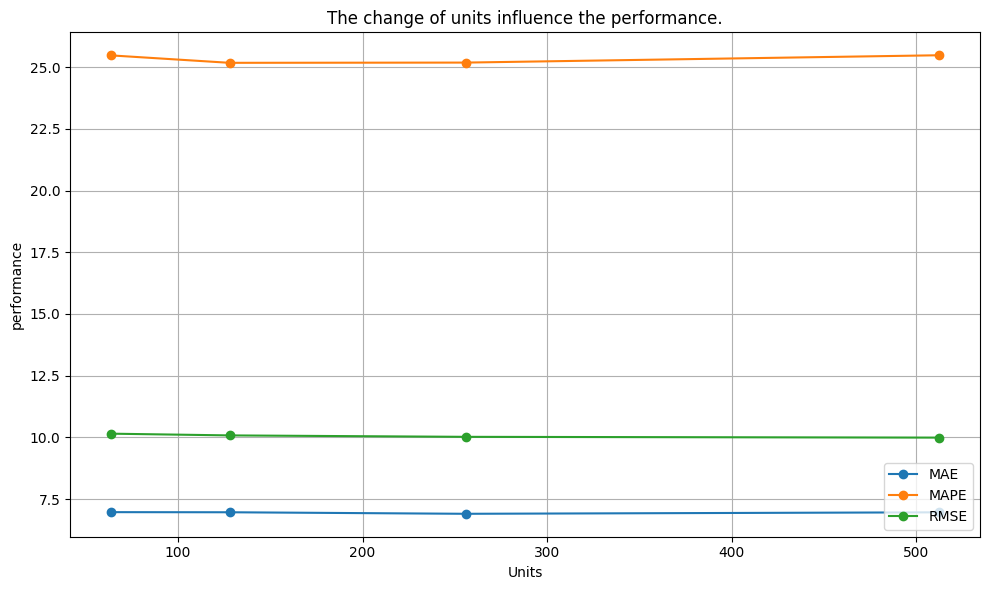

In [41]:
import matplotlib.pyplot as plt

layer_to_test = 1
epoch_to_test = 20
batch_size_to_test = 64

# 要看的項目變動，其他不動
unit_numbers = [64, 128, 256, 512]  
mae_scores = []
mape_scores = []
rmse_score = []

for unit_num in unit_numbers:
    # 過濾 找出藥用的
    filtered_records = [record for record in all_record if 
                        record["batch_size"] == batch_size_to_test and
                        record["epochs"] == epoch_to_test and
                        record["units"] == unit_num and
                        record["layer"] == layer_to_test]
    print(filtered_records)
    mae_scores.append([record["train_mae"] for record in filtered_records][0])
    mape_scores.append([record["train_mape"] for record in filtered_records][0])
    rmse_score.append([record["train_rmse"] for record in filtered_records][0])

plt.figure(figsize=(10, 6))
plt.plot(unit_numbers, mae_scores, marker='o', label="MAE")
plt.plot(unit_numbers, mape_scores, marker='o', label="MAPE")
plt.plot(unit_numbers, rmse_score, marker='o', label="RMSE")


plt.xlabel('Units')
plt.ylabel('performance')
plt.title('The change of units influence the performance.')
plt.grid(True)
plt.legend(loc = 'lower right')

plt.tight_layout()
plt.show()

[{'layer': 1, 'units': 128, 'epochs': 5, 'batch_size': 64, 'activation': 'relu', 'optimizer': 'adam', 'train_mae': 7.220568656921387, 'train_mape': 26.94985568523407, 'train_rmse': 10.534756492693676, 'test_mae': 8.814265251159668, 'test_mape': 30.033284425735474, 'test_rmse': 14.235763666311897}]
[{'layer': 1, 'units': 128, 'epochs': 10, 'batch_size': 64, 'activation': 'relu', 'optimizer': 'adam', 'train_mae': 7.043642044067383, 'train_mape': 25.845202803611755, 'train_rmse': 10.253259652232247, 'test_mae': 8.814265251159668, 'test_mape': 28.823009133338928, 'test_rmse': 14.235763666311897}]
[{'layer': 1, 'units': 128, 'epochs': 20, 'batch_size': 64, 'activation': 'relu', 'optimizer': 'adam', 'train_mae': 6.963493824005127, 'train_mape': 25.177636742591858, 'train_rmse': 10.078141276028523, 'test_mae': 8.814265251159668, 'test_mape': 27.83121168613434, 'test_rmse': 14.235763666311897}]


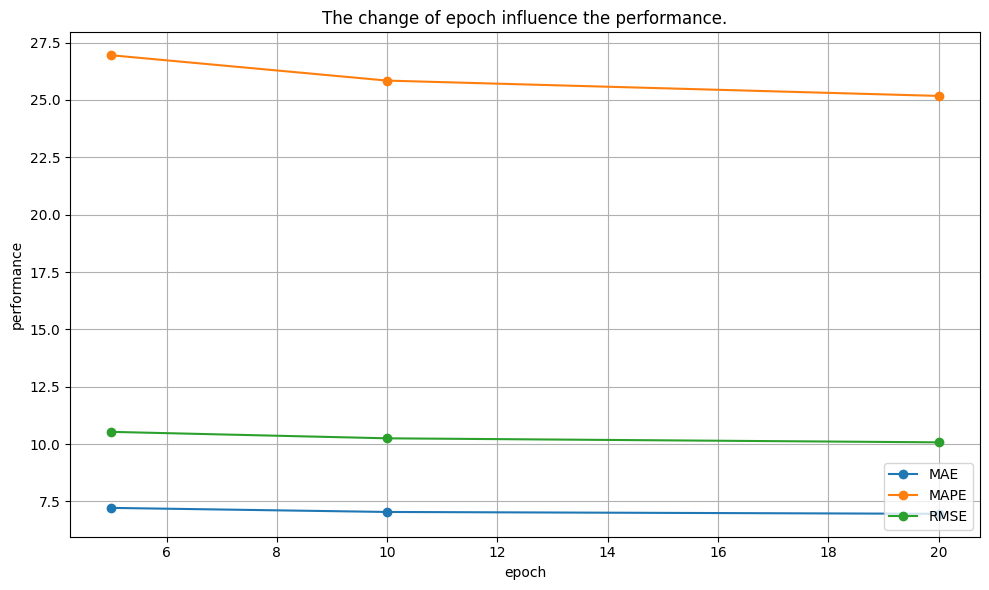

In [46]:
import matplotlib.pyplot as plt

layer_to_test = 1
epoch_to_test = [5, 10, 20]
batch_size_to_test = 64

# 要看的項目變動，其他不動
unit_numbers = 128  
mae_scores = []
mape_scores = []
rmse_score = []

for epo in epoch_to_test:
    # 過濾 找出藥用的
    filtered_records = [record for record in all_record if 
                        record["batch_size"] == batch_size_to_test and
                        record["epochs"] == epo and
                        record["units"] == unit_numbers and
                        record["layer"] == layer_to_test]
    print(filtered_records)
    mae_scores.append([record["train_mae"] for record in filtered_records][0])
    mape_scores.append([record["train_mape"] for record in filtered_records][0])
    rmse_score.append([record["train_rmse"] for record in filtered_records][0])

plt.figure(figsize=(10, 6))
plt.plot(epoch_to_test, mae_scores, marker='o', label="MAE")
plt.plot(epoch_to_test, mape_scores, marker='o', label="MAPE")
plt.plot(epoch_to_test, rmse_score, marker='o', label="RMSE")


plt.xlabel('epoch')
plt.ylabel('performance')
plt.title('The change of epoch influence the performance.')
plt.grid(True)
plt.legend(loc = 'lower right')

plt.tight_layout()
plt.show()

[{'layer': 1, 'units': 128, 'epochs': 10, 'batch_size': 64, 'activation': 'relu', 'optimizer': 'adam', 'train_mae': 7.043642044067383, 'train_mape': 25.845202803611755, 'train_rmse': 10.253259652232247, 'test_mae': 8.814265251159668, 'test_mape': 28.823009133338928, 'test_rmse': 14.235763666311897}]
[{'layer': 2, 'units': 128, 'epochs': 10, 'batch_size': 64, 'activation': 'relu', 'optimizer': 'adam', 'train_mae': 7.09232759475708, 'train_mape': 25.130698084831238, 'train_rmse': 10.253815103761571, 'test_mae': 8.814265251159668, 'test_mape': 29.503411054611206, 'test_rmse': 14.235763666311897}]
[{'layer': 3, 'units': 128, 'epochs': 10, 'batch_size': 64, 'activation': 'relu', 'optimizer': 'adam', 'train_mae': 6.996908664703369, 'train_mape': 25.475308299064636, 'train_rmse': 10.130842618853022, 'test_mae': 8.814265251159668, 'test_mape': 29.1251003742218, 'test_rmse': 14.235763666311897}]


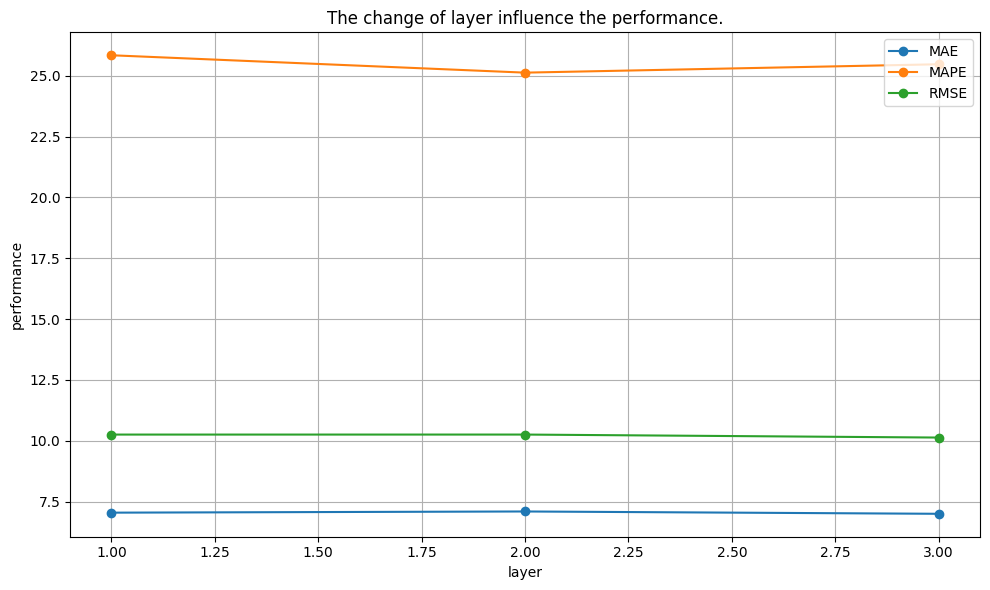

In [47]:
import matplotlib.pyplot as plt

layer_to_test = [1, 2, 3]
epoch_to_test = 10
batch_size_to_test = 64

# 要看的項目變動，其他不動
unit_numbers = 128  
mae_scores = []
mape_scores = []
rmse_score = []

for lay in layer_to_test:
    # 過濾 找出藥用的
    filtered_records = [record for record in all_record if 
                        record["batch_size"] == batch_size_to_test and
                        record["epochs"] == epoch_to_test and
                        record["units"] == unit_numbers and
                        record["layer"] == lay]
    print(filtered_records)
    mae_scores.append([record["train_mae"] for record in filtered_records][0])
    mape_scores.append([record["train_mape"] for record in filtered_records][0])
    rmse_score.append([record["train_rmse"] for record in filtered_records][0])

plt.figure(figsize=(10, 6))
plt.plot(layer_to_test, mae_scores, marker='o', label="MAE")
plt.plot(layer_to_test, mape_scores, marker='o', label="MAPE")
plt.plot(layer_to_test, rmse_score, marker='o', label="RMSE")


plt.xlabel('layer')
plt.ylabel('performance')
plt.title('The change of layer influence the performance.')
plt.grid(True)
plt.legend(loc = 'upper right')

plt.tight_layout()
plt.show()

[{'layer': 1, 'units': 128, 'epochs': 10, 'batch_size': 32, 'activation': 'relu', 'optimizer': 'adam', 'train_mae': 7.095277786254883, 'train_mape': 25.828048586845398, 'train_rmse': 10.193871874989942, 'test_mae': 8.814265251159668, 'test_mape': 29.000866413116455, 'test_rmse': 14.235763666311897}]
[{'layer': 1, 'units': 128, 'epochs': 10, 'batch_size': 64, 'activation': 'relu', 'optimizer': 'adam', 'train_mae': 7.043642044067383, 'train_mape': 25.845202803611755, 'train_rmse': 10.253259652232247, 'test_mae': 8.814265251159668, 'test_mape': 28.823009133338928, 'test_rmse': 14.235763666311897}]
[{'layer': 1, 'units': 128, 'epochs': 10, 'batch_size': 128, 'activation': 'relu', 'optimizer': 'adam', 'train_mae': 7.164577960968018, 'train_mape': 26.71564221382141, 'train_rmse': 10.44126120772343, 'test_mae': 8.814265251159668, 'test_mape': 29.501613974571228, 'test_rmse': 14.235763666311897}]
[{'layer': 1, 'units': 128, 'epochs': 10, 'batch_size': 256, 'activation': 'relu', 'optimizer': 'a

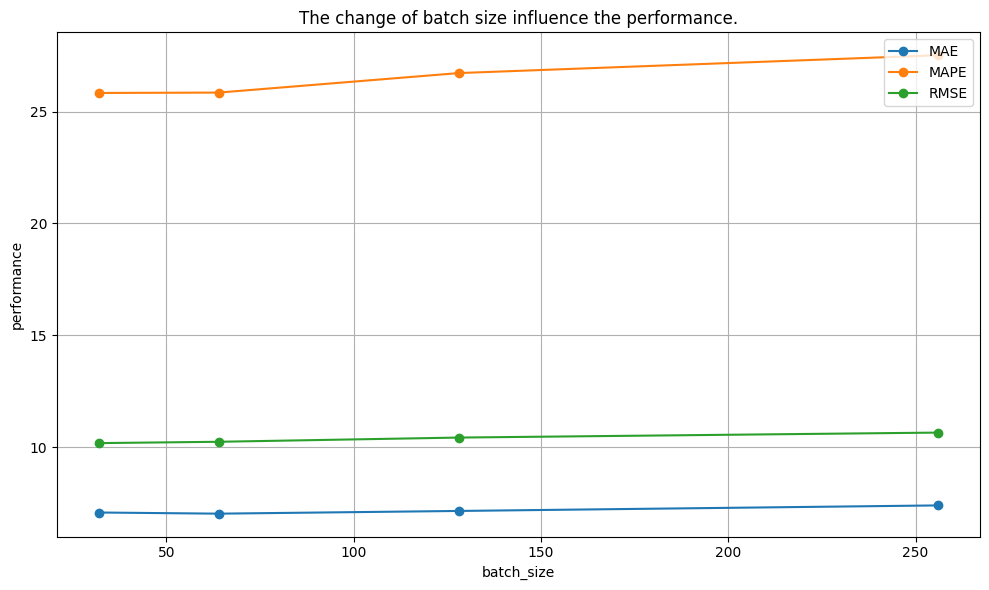

In [50]:
import matplotlib.pyplot as plt

layer_to_test = 1
epoch_to_test = 10
batch_size_to_test = [32, 64, 128, 256]

# 要看的項目變動，其他不動
unit_numbers = 128  
mae_scores = []
mape_scores = []
rmse_score = []

for bat in batch_size_to_test:
    # 過濾 找出藥用的
    filtered_records = [record for record in all_record if 
                        record["batch_size"] == bat and
                        record["epochs"] == epoch_to_test and
                        record["units"] == unit_numbers and
                        record["layer"] == layer_to_test]
    print(filtered_records)
    mae_scores.append([record["train_mae"] for record in filtered_records][0])
    mape_scores.append([record["train_mape"] for record in filtered_records][0])
    rmse_score.append([record["train_rmse"] for record in filtered_records][0])

plt.figure(figsize=(10, 6))
plt.plot(batch_size_to_test, mae_scores, marker='o', label="MAE")
plt.plot(batch_size_to_test, mape_scores, marker='o', label="MAPE")
plt.plot(batch_size_to_test, rmse_score, marker='o', label="RMSE")


plt.xlabel('batch_size')
plt.ylabel('performance')
plt.title('The change of batch size influence the performance.')
plt.grid(True)
plt.legend(loc = 'upper right')

plt.tight_layout()
plt.show()

In [52]:
# import pandas as pd

# train_data_path = "./adult/adult.data"

# column_name = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 
#                'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

# aaaa = pd.read_csv(train_data_path, names = column_name)

# print("trian data shape: ", train_data_df.shape)
# print("test data shape: ", test_data_df.shape)

# #測試資料的第一row非資料內容，移除掉
# print("Train features shape:", train_data_df.shape)
# print("Test features shape:", test_data_df.shape)

# test_data_df = test_data_df.drop(test_data_df.index[0])
# test_data_df.reset_index(drop=True, inplace=True)
# test_data_df